# Model 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import load_model
from keras.regularizers import l2

In [ ]:
# Paths to the directories containing the split dataset
train_dir = r'/kaggle/input/d/shreeramt/model-3/dataset_1/train'
validation_dir = r'/kaggle/input/d/shreeramt/model-3/dataset_1/validation'
test_dir = r'/kaggle/input/d/shreeramt/model-3/dataset_1/test'

In [ ]:
# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 10

# # Define data generators
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=IMAGE_SIZE,
#         batch_size=BATCH_SIZE,
#         class_mode='categorical')

# validation_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = validation_datagen.flow_from_directory(
#         validation_dir,
#         target_size=IMAGE_SIZE,
#         batch_size=BATCH_SIZE,
#         class_mode='categorical')

# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#         test_dir,
#         target_size=IMAGE_SIZE,
#         batch_size=BATCH_SIZE,
#         class_mode='categorical')

In [ ]:
# Define data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

In [ ]:
# Define CNN model
# model = Sequential([
#     Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(2048, activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(NUM_CLASSES, activation='softmax')
# ])


In [ ]:
# # Define CNN model with regularization and batch normalization
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(NUM_CLASSES, activation='softmax')
# ])

In [ ]:
# Define CNN model with regularization and batch normalization
input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)

model = Sequential([
    Input(shape=input_shape),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define EarlyStopping callback with adjusted patience
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define ReduceLROnPlateau callback to adjust learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Compile the model with an initial learning rate
initial_learning_rate = 6.0000e-04
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])





# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the model summary to check the input shape
print(model.summary())

In [ ]:

# Train the model with both callbacks
history = model.fit(train_generator,
                    epochs=10,  # Adjust the number of epochs as needed
                    validation_data=validation_generator,
                    callbacks=[early_stopping, reduce_lr])


# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // BATCH_SIZE,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // BATCH_SIZE
# )

# Save the trained model
model.save('/kaggle/working/saved_model_3_0_1.keras')

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

In [ ]:
# Save the trained model
model.save('/kaggle/working/saved_model_3_1.h5')

In [ ]:
# Get predictions on testing data
test_steps = len(test_generator)
y_pred = model.predict(test_generator, steps=test_steps)
y_true = test_generator.classes

In [ ]:
  # Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

#Plot confusion matrix
classes = list(test_generator.class_indices.keys())
print(classes)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Model 2 transfer learning
## (lil bit modified)




In [26]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.applications import DenseNet121
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization, Input
from keras.applications import ResNet50
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image
# !pip install split-folders
# import splitfolders

In [27]:
train_aug = '/kaggle/input/d/shreeramt/model-3/dataset_1'



In [28]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [29]:
input_folder = train_aug
train_dir = '/kaggle/input/d/shreeramt/model-3/dataset_1/train'
test_dir = '/kaggle/input/d/shreeramt/model-3/dataset_1/test'
val_dir = '/kaggle/input/d/shreeramt/model-3/dataset_1/validation'

In [30]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range=30,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_ds = train_datagen.flow_from_directory(train_dir,
                                            class_mode='categorical',
                                            batch_size=32,
                                            target_size=(256, 256))

test_ds = test_datagen.flow_from_directory(test_dir,
                                          class_mode='categorical',
                                          batch_size=32,
                                          target_size=(256, 256),
                                          shuffle=False)

val_ds = val_datagen.flow_from_directory(val_dir,
                                        class_mode='categorical',
                                        batch_size=32,
                                        target_size=(256, 256),
                                        shuffle=False)

Found 14751 images belonging to 10 classes.
Found 1853 images belonging to 10 classes.
Found 1841 images belonging to 10 classes.


In [32]:
from keras.applications import DenseNet121

conv_1 = DenseNet121(weights = 'imagenet',
                    include_top = False,
                    input_shape = (256, 256, 3))

conv_1.trainable = False

model = Sequential()

model.add(conv_1)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [33]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from keras.models import load_model
# from keras.regularizers import l2

# # Define CNN model with regularization and batch normalization
# input_shape = (256, 256, 3)

# model = Sequential([
#     Input(shape=input_shape),
#     Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
#     BatchNormalization(),
#     Dropout(0.20),
#     Dense(10, activation='softmax')
# ])

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [35]:
images_train = 0
for dir in os.listdir(train_dir):
    subdir_path = os.path.join(train_dir, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The no of Images inside the Sub-directory {dir}: {num_files}')
        images_train += num_files
print()
print(images_train)

The no of Images inside the Sub-directory neck_blast: 1057
The no of Images inside the Sub-directory tungro: 1640
The no of Images inside the Sub-directory bacterial_leaf_blight: 1409
The no of Images inside the Sub-directory sheath_blight: 1492
The no of Images inside the Sub-directory brown_spot: 1488
The no of Images inside the Sub-directory healthy: 1505
The no of Images inside the Sub-directory narrow_brown_spot: 1438
The no of Images inside the Sub-directory leaf_scald: 1644
The no of Images inside the Sub-directory leaf_blast: 1730
The no of Images inside the Sub-directory rice_hispa: 1348

14751


In [36]:
images_test = 0
for dir in os.listdir(test_dir):
    subdir_path = os.path.join(test_dir, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images inside the Sub-directory {dir}: {num_files}')
        images_test += num_files 
print()
print(images_test)

The No of Images inside the Sub-directory neck_blast: 133
The No of Images inside the Sub-directory tungro: 205
The No of Images inside the Sub-directory bacterial_leaf_blight: 177
The No of Images inside the Sub-directory sheath_blight: 188
The No of Images inside the Sub-directory brown_spot: 186
The No of Images inside the Sub-directory healthy: 189
The No of Images inside the Sub-directory narrow_brown_spot: 181
The No of Images inside the Sub-directory leaf_scald: 207
The No of Images inside the Sub-directory leaf_blast: 217
The No of Images inside the Sub-directory rice_hispa: 170

1853


In [37]:
# import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define batch size and total number of training and testing samples
# batch_size = 32
# total_train_samples = images_train # 11790 images
# total_test_samples = images_test # 2361 images

# Define the initial learning rate
initial_lr = 0.001

# Define the learning rate scheduler (Cyclical Learning Rate)
# clr = tfa.optimizers.CyclicalLearningRate(
#     initial_learning_rate=initial_lr,
#     maximal_learning_rate= 10 * initial_lr,
#     step_size= 2 * total_train_samples // batch_size,  # Total cycles = 2
#     scale_mode="cycle",
#     scale_fn=lambda x: 1 / (2.0 ** (x - 1))
# )

# Compile the model with the Adam optimizer and Cyclical Learning Rate
opt = Adam()
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with the learning rate scheduler and early stopping
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
#     steps_per_epoch=total_train_samples // batch_size,  
#     validation_steps=total_test_samples // batch_size,  
    callbacks=[early_stopping]
)

Epoch 1/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 644s 1s/step - accuracy: 0.7038 - loss: 0.9880 - val_accuracy: 0.9071 - val_loss: 0.2938
Epoch 2/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.8718 - loss: 0.3652 - val_accuracy: 0.9185 - val_loss: 0.2560
Epoch 3/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 488s 1s/step - accuracy: 0.8952 - loss: 0.2982 - val_accuracy: 0.9354 - val_loss: 0.1870
Epoch 4/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 476s 1s/step - accuracy: 0.9096 - loss: 0.2619 - val_accuracy: 0.9332 - val_loss: 0.1729
Epoch 5/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 478s 1s/step - accuracy: 0.9175 - loss: 0.2343 - val_accuracy: 0.9364 - val_loss: 0.1708
Epoch 6/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 477s 1s/step - accuracy: 0.9225 - loss: 0.2203 - val_accuracy: 0.9468 - val_loss: 0.1643
Epoch 7/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 474s 1s/step - accuracy: 0.9284 - loss: 0.2079 - val_accuracy: 0.9549 - val_loss: 0.1226
Epoch 8/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 473s 1s/step - accuracy: 0.9354 - loss: 0.1827 - val_accu

58/58 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step 


<Figure size 800x600 with 0 Axes>

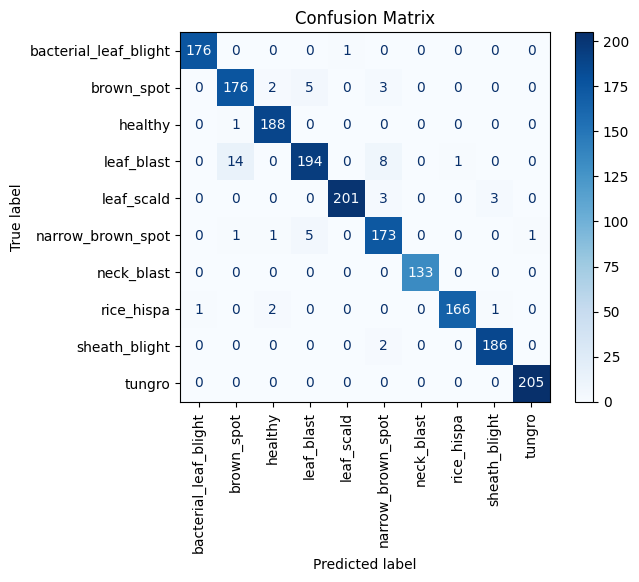

In [38]:
# Assuming 'model' is already trained
true_labels = test_ds.labels
pred_probs = model.predict(test_ds)
pred_labels = np.argmax(pred_probs, axis=1)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display the confusion matrix
class_labels = list(test_ds.class_indices.keys())  # Get class labels from the generator
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Confusion Matrix')
plt.show()

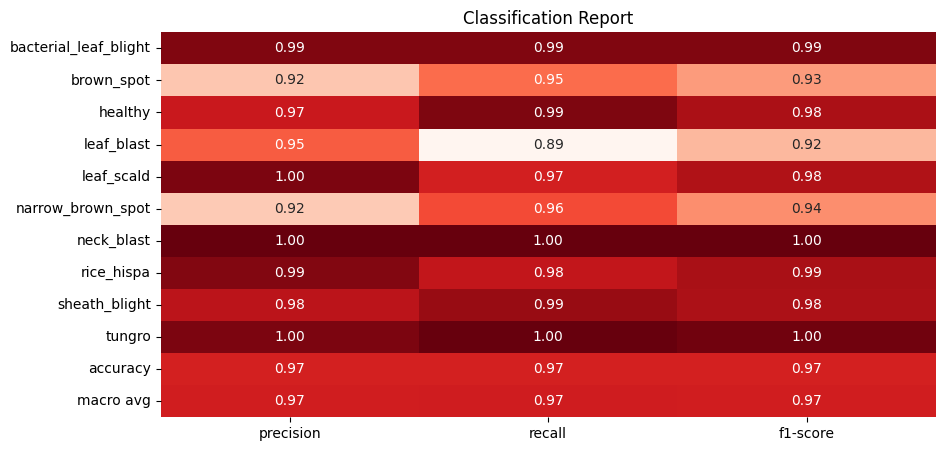

In [39]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true_labels1 and pred_labels1 from your CNN model

# Generate a classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels, output_dict=True)

# Convert the report to a DataFrame for better visualization
import pandas as pd
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap=plt.cm.Reds,fmt=".2f", cbar=False)
plt.title('Classification Report')
plt.show()

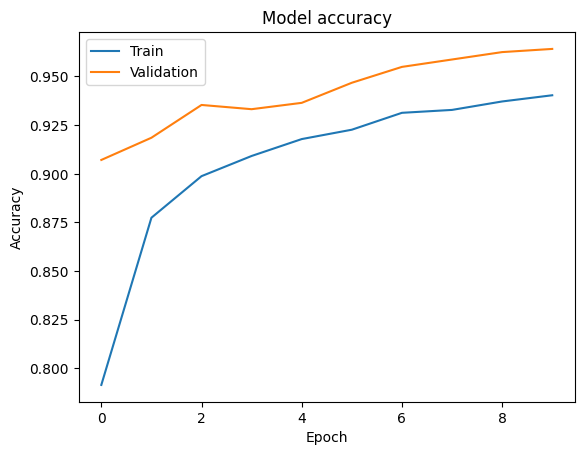

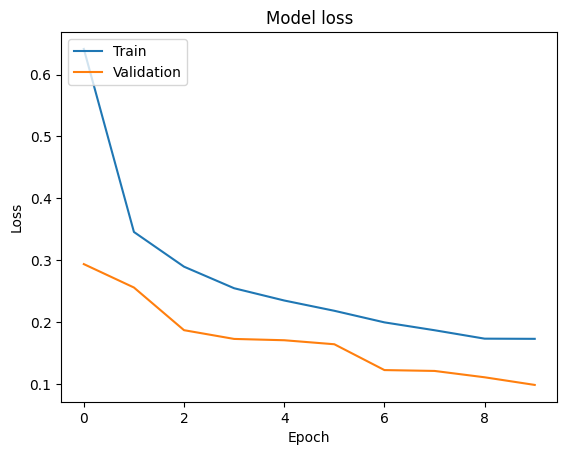

In [40]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [41]:
model.save('/kaggle/working/my_model_transfer_new.keras')


In [ ]:
!pip install tensorflow --upgrade

In [1]:
import tensorflow as tf
tf.__version__

'2.16.1'